In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Project 1 - Basic Data Analytics with Pandas

In the first week, we’ll practice data exploration and data analysis in Python with a real-world dataset.
This dataset contains rich and messy data about housing market. This real-world data will provide you concrete practices for getting started with python. 

This step-by-step project will cover the most essential and useful techniques for data analysis in solving a real-world problem with key Python data analysis libraries: pandas and numpy. We’ll go through data loading and data frame creation, selection and query, grouping and function applying, plotting and writing data to file. 

In [0]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Question 1: Read the dataset from csv file, and call it housing_data**

Hint: You can read data from a CSV file using the read_csv function in pandas. By default, it assumes that the fields are comma-separated.

In [0]:
house = pd.read_csv(r'/content/gdrive/My Drive/DS2005/Week1/Project_1_Housing_dataset/dataset.csv')

**Question 2: Preview the first 10 rows with head().**

Hint: You can change the number of rows displayed by specifying a number. There is a similar function tail(), which will show you the last columns of a dataframe.

In [4]:
house.head(10)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nizhegorodskoe,7.506452e+06,43795,0.007670,0.486246,2418,852.0,2,2514,2012.0,3,0,NaN,0,0,7,0,no,0,6,19,yes,no,no,yes,no,no,no,...,737.96,1231.48,984.72,12,24,37,35,11,1,0,12,12,0,2,31,7,5.92,25.79,253,4274339,63,2010320,567,769.92,1280.08,1025.00,35,137,163,155,62,14,1,53,78,1,20,113,17,9100000
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Sokol'niki,1.032047e+07,57405,0.523439,0.042307,2459,933.0,5,2810,5050.0,5,0,4849.0,3,0,17,6,no,0,6,9,no,no,no,no,no,no,no,...,698.04,1183.01,940.52,7,41,57,37,16,2,0,17,29,0,8,56,2,25.23,12.76,228,3305831,49,1656529,635,771.05,1291.18,1031.11,34,163,194,144,81,16,3,38,80,1,27,12

**Question 3: How many columns and rows are there in the data?**

In [5]:
house.T.shape

(292, 30471)

**Question 4: Which features are available in the data? Display the features.**

Hint: The features are the column names. You can print them out.

In [6]:
print(house.columns.values)

['id' 'timestamp' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material'
 'build_year' 'num_room' 'kitch_sq' 'state' 'product_type' 'sub_area'
 'area_m' 'raion_popul' 'green_zone_part' 'indust_part'
 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25'
 'culture_objects_top_25_raion' 'shopping_centers_raion' 'office_raion'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion'
 'nuclear_reactor_raion' 'detention_facility_raion' 'full_all' 'male_f'
 'female_f' 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male'

**Question 5: What's the data type of each column? Save the datatype as data_type.**

In [7]:
data_type = house.dtypes
data_type

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object

**Question 6: Which variables are numerical variables (excluding 'id')? Put all the numerical variable in list.**

Hint: Use the index of the data_type we just created in Q5. The data type of numerical variables should be int or float. Remenber to remove the 'id'.

In [8]:
cols = house.select_dtypes([np.number]).columns
print (cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)


**Question 7: Select the first 5 rows with 'id' (the 1st column) and 'price_doc' (the last column) columns from the data.**

Hint: You can find out several ways to solve this question. 

In [9]:
df5 = house[['id','price_doc']][0:5]
df5

,id,price_doc
0,1,5850000
1,2,6000000
2,3,5700000
3,4,13100000
4,5,16331452


**Question 8: Select the rows with the full area larger than 10 and smaller than 1500. Full area is indicated by 'full_sq'.**

Hint: You can use boolean indexing or query. Try both methods.

In [10]:
house[(house['full_sq']> 10 )&(house['full_sq']< 1500 )]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,5088.0,4,10311,12721.0,4,0,NaN,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,...,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06

**Question 9: Find the index of the rows with full area ('full_sq') smaller than living area ('life_sq'). Change the 'life_sq' in these rows to NAN.**

In [11]:
index = house.index[house['full_sq'] < house['life_sq']].tolist()
house['life_sq'].loc[index].replace(np.nan)
house['life_sq']

0        27.0
1        19.0
2        29.0
3        50.0
4        77.0
         ... 
30466    27.0
30467    59.0
30468     NaN
30469    32.0
30470    28.0
Name: life_sq, Length: 30471, dtype: float64

**Question 10: Check how many rows in life_sq are NAN?**

In [12]:
house['life_sq'].isna().sum()

6383

**Question 11: The 'product_type' column tells us whether this housing is a owner-occupier purchase or investment. Which type is more common? What's the percentage of each type?**

In [13]:
count = house['product_type'].value_counts()
per_inv = count[0] / (count[1] + count[0])
per_own = count[1] / (count[1] + count[0])
print('per_inv = {:.2%}, per_own = {:.2%}'.format(per_inv, per_own))

per_inv = 63.82%, per_own = 36.18%


**Question 12: Group the data by 'product_type' and calculate the median price for each type. The price is indicated by 'price_doc' column.**

Hint: First select the two columns, then group and aggregate. If you choose .aggragate() method, use np.median for the median calculation.

In [14]:
house[['product_type','price_doc']].groupby('product_type').mean()

,price_doc
product_type,
Investment,7.495294e+06
OwnerOccupier,6.466255e+06


**Question 13: Check how many houses are there in each product type and each state. First group by product_type and then group by state. Name this as grouped**

In [15]:
grouped = house.groupby(['product_type','state'], as_index=False).size()
grouped

product_type   state
Investment     1.0       520
               2.0      5802
               3.0      5653
               4.0       413
               33.0        1
OwnerOccupier  1.0      4335
               2.0        42
               3.0       137
               4.0         9
dtype: int64

**Question 14: Unstack the state index in grouped.**

Hint: Use unstack() to turn the index values in state into column names.

In [16]:
grouped.unstack(level=-1)

state,1.0,2.0,3.0,4.0,33.0
product_type,,,,,
Investment,520.0,5802.0,5653.0,413.0,1.0
OwnerOccupier,4335.0,42.0,137.0,9.0,NaN


**Question 15: Add a new feature called 'room_size', which indicated the average living area in each room of a housing. 'num_room' is the column that shows the number of rooms.**


In [17]:
house['room_size'] = house['life_sq']/house['num_room']
house['room_size']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
30466    13.50
30467    14.75
30468      NaN
30469    16.00
30470    14.00
Name: room_size, Length: 30471, dtype: float64

**Quesion 16: Change the format of timestamp to '%Y-%m-%d'.**

Hint: For more info about timestamp in pandas, read [this document](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). 

In [18]:
house['timestamp'] = pd.to_datetime(house['timestamp'])
house['timestamp'] = house['timestamp'].dt.strftime('%Y-%m-%d')
house['timestamp']

0        2011-08-20
1        2011-08-23
2        2011-08-27
3        2011-09-01
4        2011-09-05
            ...    
30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, Length: 30471, dtype: object

**Question 17: Add new features called 'ts_year' and 'ts_dayofweek', which indicate the year and the number of the day of the week.**

Hint: you can use apply() to apply functions to the data.

In [19]:
house['timestamp'] = pd.to_datetime(house['timestamp'])
house['ts_year'] = house['timestamp'].apply(lambda x: x.year)
house['ts_dayofweek'] = house['timestamp'].apply(lambda y: y.dayofweek)
house[['ts_year','ts_dayofweek']]

,ts_year,ts_dayofweek
0,2011,5
1,2011,1
2,2011,5
3,2011,3
4,2011,0
...,...,...
30466,2015,1
30467,2015,1
30468,2015,1
30469,2015,1


**Question 18: Draw histogram of price to see the distribution.**

Hint: You can use matplotlib or pandas for this histogram. 

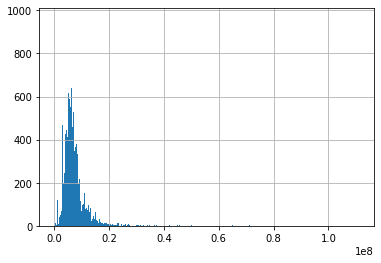

In [20]:
house['price_doc'].hist(bins=1000)

**Question 19: From the plot in Q15, most of the data have smaller values and the right tail of the distribution is very long. Apply a logorithm transformation to price and add this as a new feature called 'log_price'.**

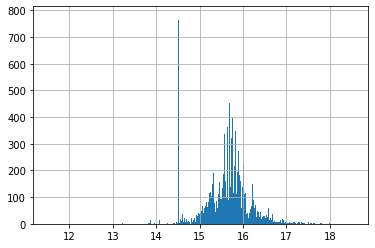

In [21]:
house['log_price'] = np.log(house['price_doc'])
house['log_price']
house['log_price'].hist(bins=1000)

**Question 20: Drop the log_price column.**

In [22]:
house.drop(['log_price'], axis=1)
house

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,room_size,ts_year,ts_dayofweek,log_price
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000,NaN,2011,5,15.581952
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000,NaN,2011,1,15.607270
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000,NaN,2011,5,15.555977
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000,NaN,2011,3,16.388123
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452,NaN,2011,0,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,5088.0,4,10311,12721.0,4,0,NaN,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,...,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000,13.50,2015,1,15.816991
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,Investment,Tverskoe,7.307411e+06,7

**Question 21: Save the dataframe we have now to housing_data_new.csv file**

In [0]:
house.to_csv(r'/content/gdrive/My Drive/DS2005/Week1/housing_date_new.csv',index=False)